In [1]:
import pandas as pd

df = pd.read_excel('news_categories.xlsx')

In [2]:
df.head()

,Unnamed: 0,category,headline,authors,link,short_description,date
0,0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         200853 non-null  int64         
 1   category           200853 non-null  object        
 2   headline           200847 non-null  object        
 3   authors            164233 non-null  object        
 4   link               200853 non-null  object        
 5   short_description  181121 non-null  object        
 6   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 10.7+ MB


In [4]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148970 entries, 0 to 200848
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Unnamed: 0         148970 non-null  int64         
 1   category           148970 non-null  object        
 2   headline           148970 non-null  object        
 3   authors            148970 non-null  object        
 4   link               148970 non-null  object        
 5   short_description  148970 non-null  object        
 6   date               148970 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 9.1+ MB


In [5]:
df.drop(['Unnamed: 0', 'link', 'date', 'authors'], axis=1, inplace=True)
df.head()

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."


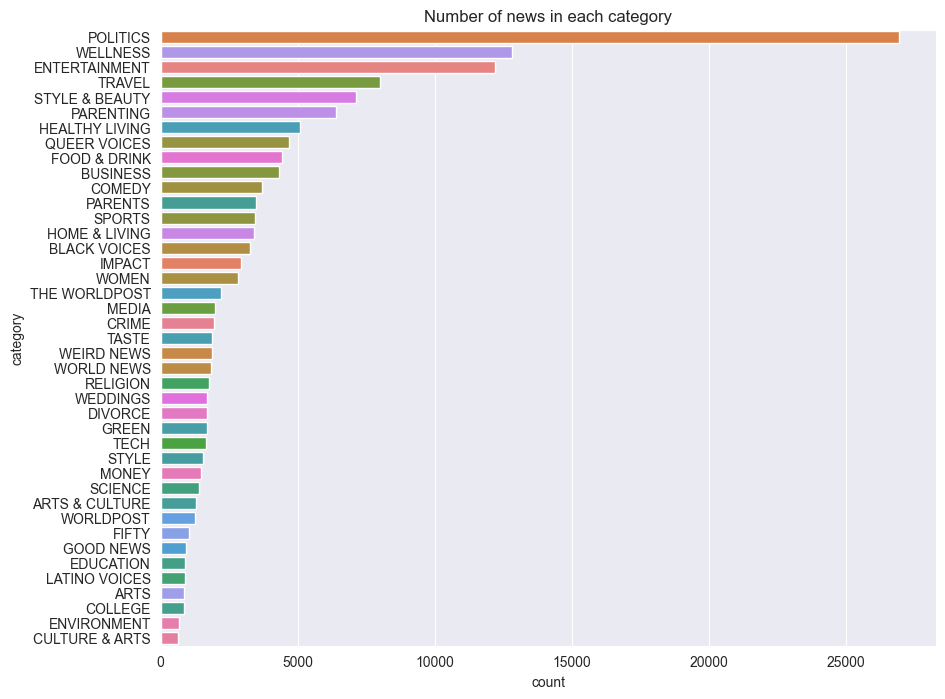

In [6]:
def make_count_plot(df: pd.DataFrame):
    from seaborn import countplot
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 8))
    
    countplot(data=df, 
              y='category', 
              order=df['category'].value_counts().index,
              hue='category',
              dodge=False,
              )
    
    plt.title('Number of news in each category')
    plt.show()
    
make_count_plot(df)

In [7]:
category_mapping = {
    'POLITICS': 'Politics & World News',
    'WORLD NEWS': 'Politics & World News',
    'THE WORLDPOST': 'Politics & World News',
    'WELLNESS': 'Wellness & Healthy Living',
    'HEALTHY LIVING': 'Wellness & Healthy Living',
    'ENTERTAINMENT': 'Entertainment',
    'TRAVEL': 'Travel',
    'STYLE & BEAUTY': 'Style, Beauty & Fashion',
    'STYLE': 'Style, Beauty & Fashion',
    'PARENTING': 'Parenting & Family',
    'PARENTS': 'Parenting & Family',
    'FOOD & DRINK': 'Food & Drink',
    'TASTE': 'Food & Drink',
    'BUSINESS': 'Business & Economy',
    'MONEY': 'Business & Economy',
    'COMEDY': 'Comedy',
    'SPORTS': 'Sports',
    'HOME & LIVING': 'Home, Living & Environment',
    'GREEN': 'Home, Living & Environment',
    'ENVIRONMENT': 'Home, Living & Environment',
    'QUEER VOICES': 'Voices',
    'BLACK VOICES': 'Voices',
    'LATINO VOICES': 'Voices',
    'MEDIA': 'Media',
    'SCIENCE': 'Science & Tech',
    'TECH': 'Science & Tech',
    'ARTS': 'Arts & Culture',
    'ARTS & CULTURE': 'Arts & Culture',
    'CULTURE & ARTS': 'Arts & Culture',
    'WEDDINGS': 'Life Milestones',
    'DIVORCE': 'Life Milestones',
    'FIFTY': 'Life Milestones',
    'GOOD NEWS': 'Good News',
    'EDUCATION': 'Education',
    'COLLEGE': 'Education',
    'WEIRD NEWS': 'Weird News',
    'CRIME': 'Crime',
    'IMPACT': 'Impact',
    'WOMEN': 'Women',
    'RELIGION': 'Religion'
}

df['category'] = df['category'].map(category_mapping).fillna(df['category'])
df['full_text'] = df['headline'].astype(str) + df['short_description'].astype(str)
df.drop(['headline', 'short_description'], axis=1, inplace=True)
df.head()

,category,full_text
0,Crime,There Were 2 Mass Shootings In Texas Last Week...
1,Entertainment,Will Smith Joins Diplo And Nicky Jam For The 2...
2,Entertainment,Hugh Grant Marries For The First Time At Age 5...
3,Entertainment,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,Entertainment,Julianna Margulies Uses Donald Trump Poop Bags...


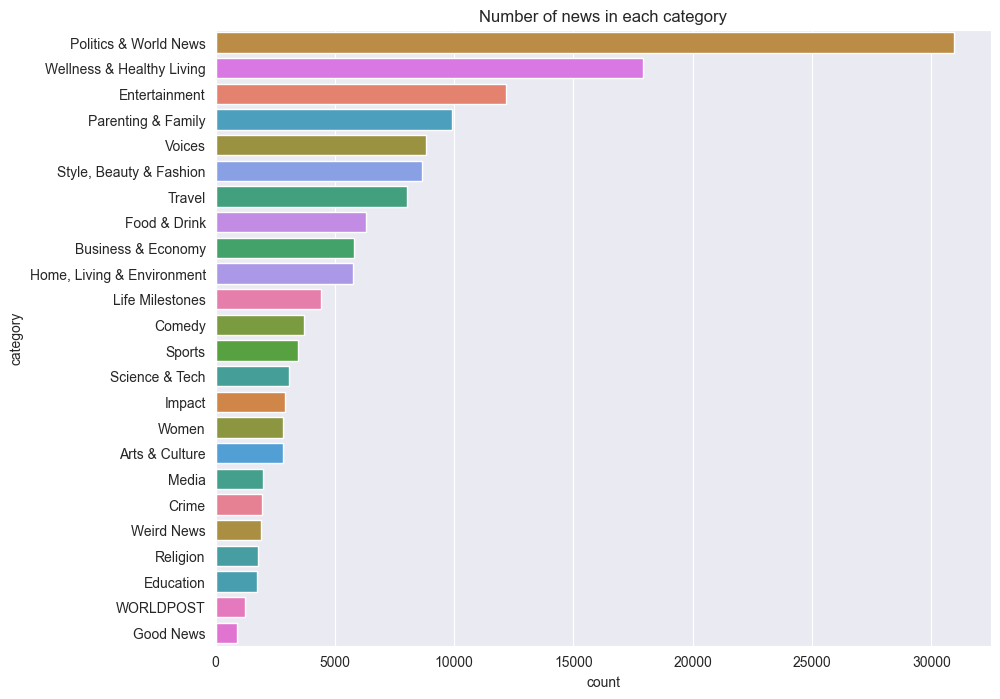

In [8]:
make_count_plot(df)

In [9]:
category_count = df['category'].value_counts()
category_to_keep = category_count[category_count > 3000].index
df = df[df['category'].isin(category_to_keep)]

In [10]:
downsampled_df = pd.DataFrame() 

for category, group in df.groupby('category'):
    if len(group) > 2000:
        downsampled_group = group.sample(n=2000, random_state=42)
    else:
        downsampled_group = group
    downsampled_df = pd.concat([downsampled_df, downsampled_group], ignore_index=True)

downsampled_df.head()

# Reset index of the new DataFrame if desired
downsampled_df.reset_index(drop=True, inplace=True)
downsampled_df.head()


,category,full_text
0,Business & Economy,"6 Consumer Mistakes You Absolutely, Positively..."
1,Business & Economy,"Verizon, Comcast Approach 21st Century Fox Abo..."
2,Business & Economy,America's Most Content States: 24/7 Wall St.Ot...
3,Business & Economy,Milk Prices Could Double In January If Farm Bi...
4,Business & Economy,Bloomberg Terminal Spying Targeted Ben Bernank...


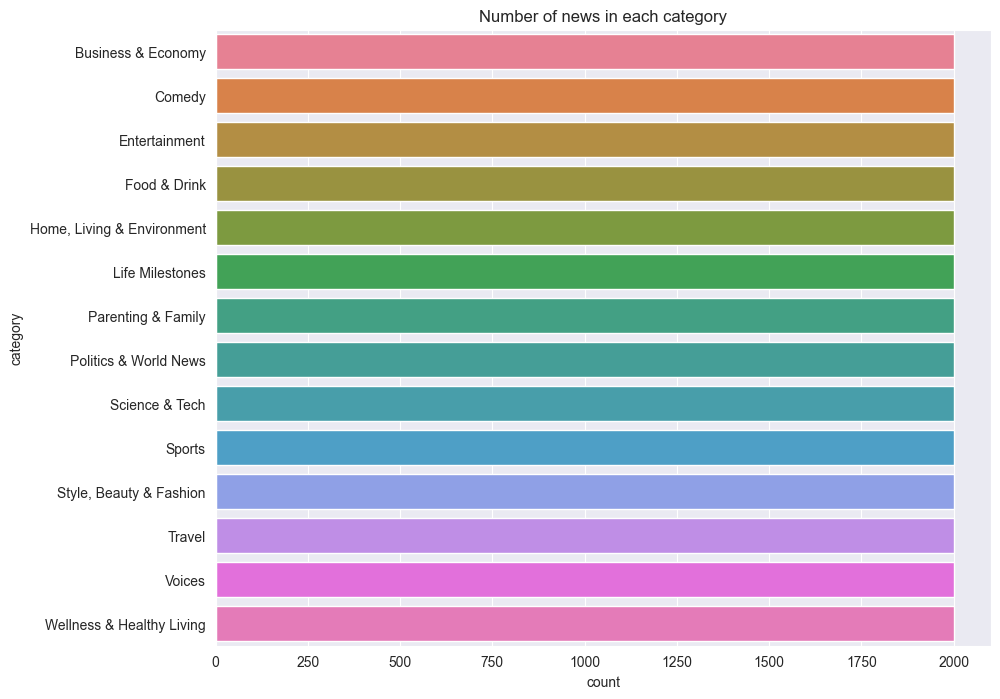

In [11]:
make_count_plot(downsampled_df)

# Data Wrangling

In [13]:
import spacy
import re

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

def remove_links(text):
    """
    Removes URLs from a given text string.
    """
    # Regex pattern to match URLs
    url_pattern = r'https?://\S+|www\.\S+'
    # Replace URLs with an empty string
    no_links_text = re.sub(url_pattern, '', text)
    return no_links_text


def tokenize_and_lemmatize(text):
    """Tokenizes and lemmatizes the input text using spaCy."""
    doc = nlp(text)
    return [token.lemma_ for token in doc]

def remove_stop_words(tokens):
    """Removes stop words from a list of tokens."""
    return [token for token in tokens if token not in nlp.Defaults.stop_words]

def remove_special_characters(tokens):
    """Removes special characters from a list of tokens."""
    return [re.sub(r'[^a-zA-Z0-9\s]', '', token) for token in tokens]

def remove_punctuation_and_whitespace(tokens):
    """Removes punctuation and whitespace from a list of tokens."""
    return [token for token in tokens if token.isalpha()]

def lowercase_tokens(tokens):
    """Converts all tokens in the list to lowercase."""
    return [token.lower() for token in tokens]

def clean_and_preprocess_text(text):
    """
    Combines all preprocessing steps to clean and preprocess the input text.
    """
    text = remove_links(text)
    
    # Tokenize and lemmatize
    tokens = tokenize_and_lemmatize(text)
    
    # Remove stop words
    tokens = remove_stop_words(tokens)
    
    # Remove special characters
    tokens = remove_special_characters(tokens)
    
    # Remove punctuation and whitespace
    tokens = remove_punctuation_and_whitespace(tokens)
    
    # Convert to lowercase
    tokens = lowercase_tokens(tokens)
    
    # Join tokens back into a string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

downsampled_df["processed_full_text"] = downsampled_df["full_text"].apply(clean_and_preprocess_text)


KeyboardInterrupt: 

In [ ]:
downsampled_df.drop(['full_text'], axis=1, inplace=True)
downsampled_df.to_csv("cleaned_news.csv", index=False)

In [ ]:
downsampled_df.info()

# Vectorization

In [ ]:
downsampled_df = pd.read_csv("cleaned_news.csv")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(downsampled_df["processed_full_text"])
tfidf_matrix.toarray()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(downsampled_df["processed_full_text"])
count_matrix.toarray()

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
hashing_vectorizer = HashingVectorizer()
hashing_matrix = hashing_vectorizer.fit_transform(downsampled_df["processed_full_text"])
hashing_matrix.toarray()

# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = tfidf_matrix
Y = downsampled_df["category"]


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)


In [ ]:
predictions = gb_clf.predict(X_test)
accuracy_score(y, predictions)

In [ ]:
# Classification report
print(classification_report(y, predictions))


In [ ]:
import seaborn as sns
# Confusion matrix
conf_matrix = confusion_matrix(y, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

In [ ]:
from joblib import dump
dump(gb_clf, 'news_classifier.joblib')